In [1]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [3]:
# reading the file 
house_df = pd.read_csv("Melbourne_housing.csv")

In [4]:
house_df.head() #exploring the data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Thornbury,7/67 Pender St,2,u,438000.0,SP,Love,22/08/2016,6.5,3071,...,1.0,1.0,0.0,66.0,1970.0,Darebin City Council,-37.7541,145.0088,Northern Metropolitan,8870
1,Coburg,32 Rose St,2,h,901000.0,S,Peter,27/06/2016,7.8,3058,...,1.0,1.0,545.0,107.0,1940.0,Darebin City Council,-37.7445,144.9471,Northern Metropolitan,11204
2,Bentleigh East,2/25 Brooks St,3,u,800000.0,S,Woodards,28/05/2016,13.9,3165,...,2.0,2.0,261.0,NaN,NaN,Glen Eira City Council,-37.9163,145.0779,Southern Metropolitan,10969
3,Templestowe Lower,2/35 John St,3,t,1155000.0,S,Jellis,25/11/2017,12.4,3107,...,NaN,NaN,NaN,NaN,NaN,Manningham City Council,NaN,NaN,Eastern Metropolitan,5420
4,South Yarra,1/35 Marne St,3,u,1630000.0,PI,Jellis,10/9/2016,3.3,3141,...,1.0,1.0,0.0,NaN,NaN,Melbourne City Council,-37.8359,144.9839,Southern Metropolitan,14887


## **Data Exploration and Visualization** 

Cleaning the data to drop Building Area since it is missing 62% of the data for the column is missing. Here, I will also drop NAs for Price and deal with the missing values. 

In [5]:
##Explore the Melbourne house dataset 

In [6]:
house_df = house_df.loc[:, ~house_df.columns.str.contains('^Unnamed')]

In [7]:
len(house_df.columns)

21

In [8]:
house_df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [9]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         499 non-null    object 
 1   Address        499 non-null    object 
 2   Rooms          499 non-null    int64  
 3   Type           499 non-null    object 
 4   Price          391 non-null    float64
 5   Method         499 non-null    object 
 6   SellerG        499 non-null    object 
 7   Date           499 non-null    object 
 8   Distance       499 non-null    float64
 9   Postcode       499 non-null    int64  
 10  Bedroom2       371 non-null    float64
 11  Bathroom       371 non-null    float64
 12  Car            362 non-null    float64
 13  Landsize       325 non-null    float64
 14  BuildingArea   189 non-null    float64
 15  YearBuilt      212 non-null    float64
 16  CouncilArea    499 non-null    object 
 17  Lattitude      377 non-null    float64
 18  Longtitude

In [10]:
house_df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,499.000000,3.910000e+02,499.000000,499.000000,371.000000,371.000000,362.000000,325.000000,189.000000,212.000000,377.000000,377.000000,499.000000
mean,3.028056,1.037080e+06,10.976152,3113.863727,3.083558,1.649596,1.737569,533.400000,152.461905,1968.117925,-37.805206,144.997510,7332.272545
std,0.945935,6.345152e+05,6.441436,111.281137,1.003251,0.785764,1.020658,677.848689,87.227886,35.950470,0.085016,0.113628,4184.540082
min,1.000000,2.100000e+05,1.200000,3000.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1879.000000,-38.138600,144.570500,768.000000
25%,2.000000,6.100000e+05,6.400000,3046.000000,2.000000,1.000000,1.000000,225.000000,97.000000,1950.000000,-37.853800,144.927300,4380.000000
50%,3.000000,8.705000e+05,10.400000,3101.000000,3.000000,1.000000,2.000000,535.000000,130.000000,1970.000000,-37.802500,144.998000,6543.000000
75%,4.000000,1.262500e+06,13.900000,3152.500000,4.000000,2.000000,2.000000,697.000000,194.000000,2001.000000,-37.750100,145.066200,9540.000000
max,6.000000,5.500000e+06,44.200000,3910.000000,10.000000,6.000000,8.000000,10100.000000,572.000000,2017.000000,-37.407440,145.440820,21650.000000


In [11]:
#Calculating Missing Values for each column in house_df in percentages to deal with NaNs  
cols_to_drop=[]
def display_missing_perc(df):    
    for col in df.columns.tolist():       
        missing_value = 100*(df[col].isnull().sum()/len(df[col]))
        print(f'{col} column missing values: {missing_value}')
        if missing_value >= 40:
            cols_to_drop.append(col)
    print('\n')
display_missing_perc(house_df)

Suburb column missing values: 0.0
Address column missing values: 0.0
Rooms column missing values: 0.0
Type column missing values: 0.0
Price column missing values: 21.64328657314629
Method column missing values: 0.0
SellerG column missing values: 0.0
Date column missing values: 0.0
Distance column missing values: 0.0
Postcode column missing values: 0.0
Bedroom2 column missing values: 25.651302605210418
Bathroom column missing values: 25.651302605210418
Car column missing values: 27.45490981963928
Landsize column missing values: 34.86973947895792
BuildingArea column missing values: 62.124248496993985
YearBuilt column missing values: 57.51503006012024
CouncilArea column missing values: 0.0
Lattitude column missing values: 24.448897795591183
Longtitude column missing values: 24.448897795591183
Regionname column missing values: 0.0
Propertycount column missing values: 0.0




In [12]:
## I will drop BuildingArea since it is missing 62% of the data (310/498=0.622)  
house_df = house_df.drop(columns='BuildingArea')

In [13]:
house_df.shape

(499, 20)

## The Price column holds significant importance as our dependent variable. To address missing values, we will remove the NaNs in the Price column, opting for this approach instead of multiple imputation.

In [14]:
house_df= house_df.dropna(subset=['Price'])

In [15]:
pd.set_option('display.max_rows',400)
house_df['Price']
len(house_df['Price'])

391

## We will fill in the missing values using the average (mean) of the column. This is because a significant 21% of the data is missing, and we don't know why it's missing – whether randomly or not. This choice is due to the uncertainity in the dataset. 

In [16]:
house_df['Bedroom2']= house_df['Bedroom2'].fillna(house_df['Bedroom2'].mean())
house_df['Bathroom']= house_df['Bathroom'].fillna(house_df['Bathroom'].mean())
house_df['YearBuilt']= house_df['YearBuilt'].fillna(house_df['YearBuilt'].mean())
house_df['Car']= house_df['Car'].fillna(house_df['Car'].mean())
house_df['Landsize']= house_df['Landsize'].fillna(house_df['Landsize'].mean())

In [17]:
#checking for random nan values to make sure they are resolved
print("Missing values before fillna:", house_df['Bathroom'].isnull().sum())

Missing values before fillna: 0


In [18]:
house_df.shape

(391, 20)

### Provide visualizations such as histograms, scatter plots, or box plots to understand the distribution of different features

### Include any other plots you find interesting and provide brief interpretations

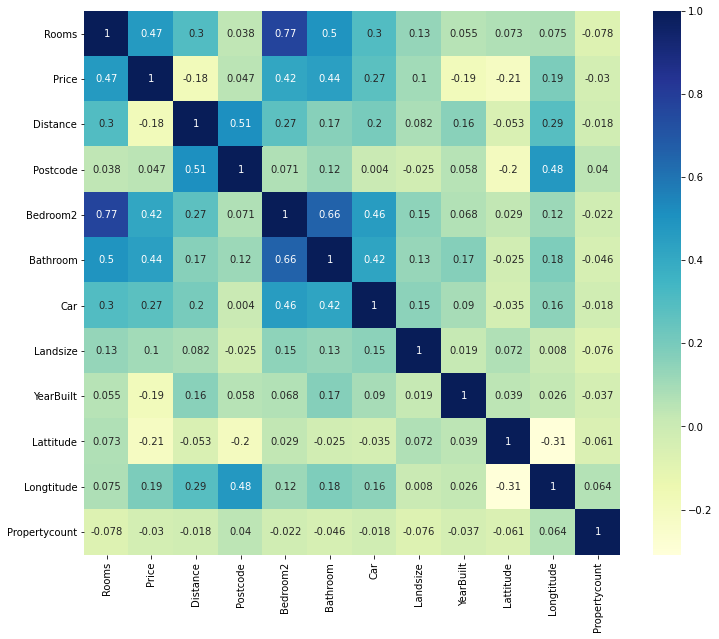

In [19]:
plt.figure(figsize=(12, 10))
sns.heatmap(house_df.corr(), cmap="YlGnBu", annot = True)
plt.show()

- This is a heatmap and it shows the correlation of all the variables, providing a visual representation that offers insights into the dataset.

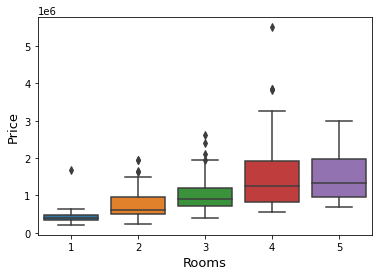

In [20]:
sns.boxplot(x='Rooms',y='Price',data=house_df )
plt.ylabel('Price', fontsize=13)
plt.xlabel('Rooms', fontsize=13)
plt.show()

- This boxplot indicates that houses with 4 to 5 rooms tend to have higher prices, with a few outliers in the 4-room category.

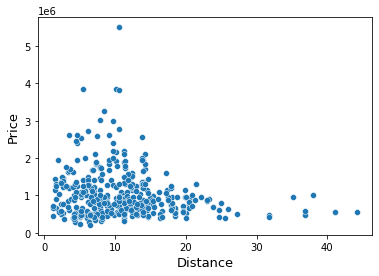

In [21]:
sns.scatterplot(x='Distance',y='Price',data=house_df)
plt.ylabel('Price', fontsize=13)
plt.xlabel('Distance', fontsize=13)
plt.show()

- This scatterplot suggests that houses closer in distance tend to have higher prices compared to those at farther distances.

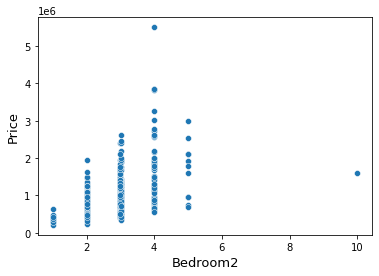

In [22]:
sns.scatterplot(x='Bedroom2',y='Price',data=house_df)
plt.ylabel('Price', fontsize=13)
plt.xlabel('Bedroom2', fontsize=13)
plt.show()

- This scatterplot implies that houses with a Bedroom2 value of 4 tend to have higher prices.

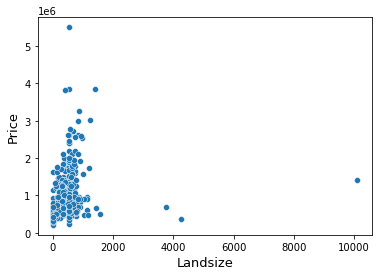

In [23]:
sns.scatterplot(x='Landsize',y='Price',data=house_df)
plt.ylabel('Price', fontsize=13)
plt.xlabel('Landsize', fontsize=13)
plt.show()

- This scatterplot illustrates that there is no clear linear relationship between Landsizes and other variables.

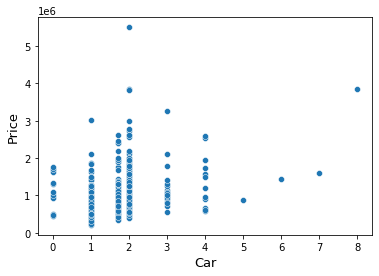

In [24]:
sns.scatterplot(x='Car',y='Price',data=house_df)
plt.ylabel('Price', fontsize=13)
plt.xlabel('Car', fontsize=13)
plt.show()

- This scatterplot reveals a subtle pattern, indicating that houses with a higher number of cars may have a higher price.

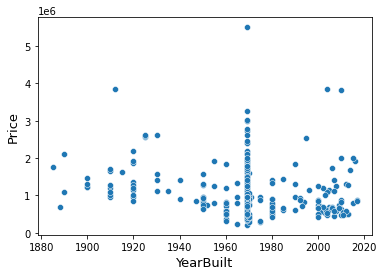

In [25]:
sns.scatterplot(x='YearBuilt',y='Price',data=house_df)
plt.ylabel('Price', fontsize=13)
plt.xlabel('YearBuilt', fontsize=13)
plt.show()

- This scatterplot displays no significant correlation between the year built and price. However, I will retain it to check its significance with other variables.

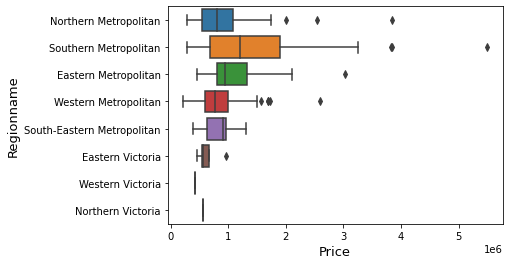

In [26]:
sns.boxplot(x='Price',y='Regionname',data=house_df)
plt.ylabel('Regionname', fontsize=13)
plt.xlabel('Price', fontsize=13)
plt.show()

- This boxplot indicates that the price tends to be higher for houses located in the Southern Metropolitan Region.

## Starting to Create my Data for Linear Regression

- Breaking Down 'Date' Column into two columsn 'PurchaseMonth' and 'PurchaseYear' so we can use them as separate features for linear regression. This would help in understanding if Year or Month have any impact on Price in Melbourne.

In [27]:
house_df['Date'] = pd.to_datetime(house_df['Date'])

# transforming Date and creating new columns
house_df['PurchaseMonth'] = house_df['Date'].dt.month
house_df['PurchaseYear'] = house_df['Date'].dt.year

In [28]:
#Removing certain variables as they offer limited utility:
#Latitude and longitude contain missing values, and multiple imputation might not provide meaningful insights. We already have region and postcode information.
#SellerG and Suburb are categorical variables that may not contribute significantly.
#Address, being a lengthy character, is omitted for simplicity.
house_df=house_df.drop(columns=['Date','SellerG','Suburb','Address','Lattitude','Longtitude'])

In [29]:
house_df.shape

(391, 16)

In [30]:
print(house_df.select_dtypes(include=['object']).columns)

Index(['Type', 'Method', 'CouncilArea', 'Regionname'], dtype='object')


## One-hot Encoding for Categorical Variables

One-hot encoding is a method used in data preprocessing to convert categorical variables into a format that machine learning models can understand. I will convert my objects in my table in house_df with this method.

In [31]:
from sklearn.preprocessing import LabelEncoder
cols = [ 'Type', 'Method', 'CouncilArea','Regionname']
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(house_df[c].values)) 
    house_df[c] = lbl.transform(list(house_df[c].values))

In [32]:
numeric_cols = house_df.select_dtypes(include=[np.number]).columns.tolist()

In [33]:
numeric_cols

['Rooms',
 'Type',
 'Price',
 'Method',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'YearBuilt',
 'CouncilArea',
 'Regionname',
 'Propertycount',
 'PurchaseMonth',
 'PurchaseYear']

In [34]:
len(numeric_cols)

16

In [35]:
# shape        
house_df.shape

(391, 16)

## **Linear Regression Model Development**

In [36]:
#spiltting my data 70-30 
train,test=train_test_split(house_df, train_size=0.7)

In [37]:
# Define dependent and independent variables
X = train.drop('Price', axis=1).values
y = train['Price'].values

In [38]:
len(X)
len(y)

273

In [39]:
# Initialize and fit the model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [40]:
model.predict(test.drop('Price', axis=1).values)

array([ 574652.17864711, 1219579.96946481, 1473031.82927378,
        905866.60158117, 1135754.34618042,  335829.6253966 ,
       1197751.23245132, 1150914.36357044,  554219.79831627,
        899612.00117545, 1068549.25510286,  637659.78011539,
       1593224.12408779,  916704.93809653,  440551.49040616,
         35682.31517765, 1276101.65531793,  804937.20250024,
        939004.03380291,  887440.51748737,   81869.35327435,
        923874.1758448 , 1342884.15960981, 1736127.03649259,
       1042077.61651687, 2057464.22516238, 1174707.61871924,
        978351.8860275 ,  916600.23958446,  951956.15428968,
        523489.41770669, 1483458.85233647,  786247.22709736,
        851072.05574832, 1059410.14980911, 1027862.56004025,
        500328.32070001, 1099390.73495793, 1072859.12472309,
        851043.4068745 , 1306633.32145111, 2305706.63225506,
        893941.53163441, 1388729.84334838, 1346509.65465122,
        474649.4299737 , 1191871.45236485, 1287270.66914423,
       1114648.90760849,

In [41]:
linear_preds=model.predict(test.drop('Price', axis=1).values)

In [42]:
#MSE for the model
mean_squared_error(test['Price'],linear_preds)

245999499754.31366

In [43]:
#R^2 for the model
r2_score(test['Price'], linear_preds)

0.4999082928748545

## **Model Evaluation**

### - Evaluate your linear regression model using appropriate metrics.

### I divided my dataset into training and testing sets. I utilized the test data to make predictions and evaluate the out-of-sample R^2 and mean squared error (MSE). Here are the results for the model.

In [44]:
#MSE for the model
mean_squared_error(test['Price'],linear_preds)

245999499754.31366

In [45]:
#R^2 for the model
r2_score(test['Price'], linear_preds)

0.4999082928748545

### - Interpret these metrics to assess the performance of your model. Is it good? Why?

- The linear regression model applied to house_df with Price as the dependent variable, gives a very high mean squared error(MSE). This value represents the average difference between the actual and predicted prices.

- The out-of-sample (OOS) R-squared score of fairly high indicates that the linear regression model explains a moderate portion of the variance in prices, leaving room for improvement.

- In statistical theory, a higher OOS R-squared and lower MSE are considered favorable indicators for a good prediction model. However, this linear regression model poses a significant challenge due to its unusually high MSE, suggesting a considerable average difference between actual and predicted prices. In practical terms, such a model may not be deemed useful. Therefore, depending on the chosen evaluation metrics, the model's effectiveness can be questionable.

- Additionally, the substantial amount of missing data contributes to the model's inaccuracy, impacting both data quality and quantity. Enhancing the nature of the data or applying penalties for utilizing numerous variables may be necessary to address these issues and improve the model's reliability

## **Regularization** 
    
### Is there a need for Lasso regularization? Explain. (Compare test and training results)

Regularization becomes important when the OOS performance drops compares to in-sample performance. In this case, the Rsquared would be lower for the OOS versus in sample. We will evalute that with model coffiecents.

In [47]:
house_df.shape

(391, 16)

In [48]:
coefficients=model.coef_

Text(0, 0.5, 'coefficients value')

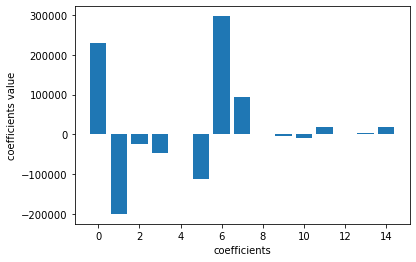

In [49]:
plt.bar(range(len(coefficients)),coefficients)
plt.xlabel('coefficients')
plt.ylabel('coefficients value')

- We need regularization because as we see the bar plot for coefficients from linear regression, we can see 3 variables have the largest coefficients. This will cause these 3 variables impact the Price of the house significanlty, causing overfitting in the data. There are ways to reduce such model complexity and preventing overfitting. The process of regularization will help in feature selection with Lasso Regression Model. Lasso fits coefficients to minimize deviance and is a great for model selection to chose betas.  

### Perform Lasso regression on both training and test data

### Set up a Lasso regression model with specified parameters and fit it to the training data.

In [50]:
#recalling numerical_cols 
len(numeric_cols)

16

In [51]:
numeric_cols

['Rooms',
 'Type',
 'Price',
 'Method',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'YearBuilt',
 'CouncilArea',
 'Regionname',
 'Propertycount',
 'PurchaseMonth',
 'PurchaseYear']

In [52]:
#dropping Price so it does not mess with Regression
numeric_cols.remove('Price')

In [53]:
#Using the same Test and Train Spilt for the Lasso Model so we can compare it to Linear

In [54]:
X_train = train[numeric_cols]
X_test  = test[numeric_cols]

y_train = train['Price']
y_test  = test['Price']

In [55]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
lasso = Lasso(alpha=2154.43)
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=2154.43)

In [57]:
y_pred_lasso = lasso.predict(X_test_scaled)

In [58]:
print("Lasso coefficients:", lasso.coef_)
print("Intercept:", lasso.intercept_)

Lasso coefficients: [ 202301.98084919 -165485.08793216  -25625.42907189 -289874.11894545
  160442.30387321  -79102.04555546  193017.03008491   82711.29462989
   17137.86703901 -110896.07911217  -85567.71871453   39333.4990628
   18347.08219291    8400.79993075    4908.43647431]
Intercept: 1024275.2747252735


In [59]:
print(len(y_pred_lasso))
print(len(y_test))

118
118


In [60]:
mse = mean_squared_error(y_test, y_pred_lasso)
r2 = r2_score(y_test, y_pred_lasso)
print("MSE:", mse)
print("R^2:", r2)

MSE: 247135416763.29816
R^2: 0.49759909030841476


In [61]:
alphas = np.logspace(-6, 6, 10)
k = 5
n = len(y_train)

# Shuffle the data
indices = np.arange(n)
np.random.shuffle(indices)
X_cv = X_train_scaled[indices]
y_cv = y_train.iloc[indices]

In [62]:
avg_rmse=[]
for alpha in alphas:
    rmse_list = []
    
    # Manual k-fold splitting
    for fold in range(k):
        # Calculate the size of each fold
        fold_size = n // k
        
        # Define the start and end indices of the test set
        start, end = fold * fold_size, (fold + 1) * fold_size
        
        test_indices = indices[start:end]
        train_indices = np.concatenate((indices[:start], indices[end:]))
        
        X_train, X_test = X_cv[train_indices], X_cv[test_indices]
        y_train, y_test = y_cv.iloc[train_indices], y_cv.iloc[test_indices]
        
        lasso = Lasso(alpha=alpha)
        
        lasso.fit(X_train, y_train)
        
        y_pred = lasso.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        
        rmse_list.append(rmse)
        
    avg_rmse.append(np.mean(rmse_list))

# Find the best alpha
best_alpha = alphas[np.argmin(avg_rmse)]
print(f"Best alpha: {best_alpha}")

Best alpha: 2154.434690031878


- The best alpha is 2154.43 and so I use that to run my Lasso

### Analyze and explain how the results change from previous answer.

- The Lasso regression model has a relatively high mean squared error (MSE) of higher and a moderate explanatory power with an R-squared (R^2) value of 0.4975990903. This R^2 value is very similar to simple linear regression. This suggests some level of inaccuracy in predicting housing prices, indicating room for improvement in model performance.

## Out-of-sample performance 

### Ignore all previously trained models.

### Split the data into a new training and test 80-20.

### Newly train (fit) the linear regression model on the training data.

In [63]:
#### Split the data into a new training and test 80-20
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8)
# Fit a new linear regression model on training data
linear = sm.OLS(Y_train, X_train).fit()

### Newly train (fit) the lasso regression model on the training data.

In [64]:
# Fit a new Lasso regression model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

lasso = Lasso(alpha=2154) #alpha
lasso.fit(X_train_scaled, Y_train)

Lasso(alpha=2154)

### Estimate AIC, AICc, BIC, as well as 5-fold CV for both models using only the training data.

In [65]:
aic = linear.aic
bic = linear.bic
n_obs = len(y_train)
n_parameter = linear.df_model + 1
aicc = aic + (2 * n_parameter * (n_parameter+1))/(n_obs - n_parameter - 1)

# 5-fold cv
fold_5 = KFold(n_splits=5, shuffle = True, random_state= 12)
model_MSE = cross_val_score(LinearRegression(), X_train, Y_train, cv = fold_5, scoring = make_scorer(mean_squared_error))
model_MSE = np.mean(model_MSE)


print(f'MSE for Linear Regression on training data is {model_MSE}.')
print(f'AIC for LR is {aic}') 
print(f'AICc LR is {aicc}') 
print(f'BIC LR is {bic}') 

MSE for Linear Regression on training data is 213373788880.70718.
AIC for LR is 6277.254538239869
AICc LR is 6279.9476075468
BIC LR is 6328.021964181706


In [66]:
# Calculate AIC, AICc, BIC, and 5-fold CV for the Lasso regression model using only the training data. 
#Additionally, manually compute AIC, AICc, BIC, and MSE from the training data

y_pred = lasso.predict(X_train)
sse = np.sum((y_pred - Y_train)**2)
k = len(lasso.coef_) + 1
n = len(y_train)

aic_lasso = n * np.log(sse / n) + 2 * k
aicc_lasso = aic_lasso + (2 * k * (k + 1)) / (n - k - 1)
bic_lasso = n * np.log(sse / n) + k * np.log(n)

# 5-fold cv
fold_5 = KFold(n_splits=5, shuffle = True, random_state= 12)
model_lasso_MSE = cross_val_score(lasso, X_train, Y_train, cv = fold_5, scoring = make_scorer(mean_squared_error))
model_lasso_MSE = np.mean(model_lasso_MSE)

print(f'MSE for Lasso Regression on training data is {model_lasso_MSE}.')
print(f'AIC for Lasso LR is {aic_lasso}') 
print(f'AICc for Lasso LR is {aicc_lasso}') 
print(f'BIC for Lasso LR is {bic_lasso}') 

MSE for Lasso Regression on training data is 211771835408.18613.
AIC for Lasso LR is 8610.738951513209
AICc for Lasso LR is 8613.432020820139
BIC for Lasso LR is 8664.964099190272


- In terms of the training data evaluation metrics, Linear Regression appears to be a better choice. Linear Regression exhibits a lower MSE and more favorable values for information criteria metrics— AIC, AICc, and BIC. These lower information criteria values in Linear Regression suggest that it achieves a good balance between model fit and complexity, indicating a potentially better fit to the training data compared to Lasso Regression. In all fairness, both models have overall bad performance which could relate to data and the presence of a large number of missing values, coupled with potential issues such as outliers, may have negatively impacted the reliability of the models. 

### Estimate the models true OOS performance by computing their deviance on the test data.

### Compare all (deviance) values. Which IC is most similar to the models’ true OOS performance? How does 5-fold CV compare? Explain.

In [67]:
def deviance(y, pred, family="gaussian"):
    if family == "gaussian":
        return np.sum((y - pred) ** 2)
    elif family == "binomial":
        y = np.array(y)
        pred = np.array(pred)
        return -2 * np.sum(y * np.log(pred) + (1 - y) * np.log(1 - pred))

In [68]:
# OOS performance by computing their deviance on the test data

# linear regression model
y_pred_test_linear = linear.predict(X_test)
linear_model_deviance = deviance(Y_test, y_pred_test_linear)

# lasso regression model
y_pred_test_lasso = lasso.predict(X_test)
lasso_model_deviance = deviance(Y_test, y_pred_test_lasso)

print(f'The deviance on the test data for Linear regression model is {linear_model_deviance}.','\n')
print(f'The deviance on the test data for Lasso regression model is {lasso_model_deviance}.')

The deviance on the test data for Linear regression model is 5230134324031.939. 

The deviance on the test data for Lasso regression model is 5.336638751892325e+18.


- The deviance values on the OOS test data further highlight the challenges in model fit and performance. For the Linear regression model, the deviance is indicating substantial issues between the predicted and actual values. The Lasso regression model exhibits an even more significant deviance. These results suggest potential issues with both models' ability to accurately capture the underlying patterns in the data. 